In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

import torch
from torch import  nn
from torchvision import transforms ,datasets
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.optim.lr_scheduler as lr_scheduler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
TrainData=datasets.CIFAR10(root="/home/yash/CNN_Data",train=True,transform=transforms.ToTensor(),download=True)
TestData=datasets.CIFAR10(root="/home/yash/CNN_Data",train=False,transform=transforms.ToTensor(),download=True)

length=len(TrainData)
lengthT=len(TestData)


TrainDataSet=DataLoader(TrainData,batch_size=64)
TestDataSet=DataLoader(TestData,batch_size=64)

for data in TestDataSet:
    Xtesting,Ytesting=data

Xtesting,Ytesting=Xtesting.to(device),Ytesting.to(device)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
class AdanceNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.Conv1=nn.LazyConv2d(out_channels=1024,kernel_size=(5,5))
        self.Pool1=nn.AvgPool2d(kernel_size=(2,2),stride=2)
        self.Conv2=nn.LazyConv2d(out_channels=512,kernel_size=(3,3),padding=4)
        self.Conv3=nn.LazyConv2d(out_channels=256,kernel_size=(2,2))
        self.Conv4=nn.LazyConv2d(out_channels=126,kernel_size=(2,2))
        # self.Conv5=nn.LazyConv2d(out_channels=128,kernel_size=(2,2))
        self.Pool2=nn.AvgPool2d(kernel_size=(3,3),stride=4)
        self.Conv6=nn.LazyConv2d(out_channels=64,kernel_size=(2,2),padding=2)
        self.Pool3=nn.MaxPool2d(kernel_size=(2,2))
        self.Flat=nn.Flatten()
        self.Linear1=nn.LazyLinear(out_features=64)
        self.Linear2=nn.LazyLinear(out_features=32)
        self.Linear3=nn.LazyLinear(out_features=1)
        self.Relu=nn.ReLU()
        self.Sigmoid=nn.Sigmoid() 
        self.Drop1=nn.Dropout(p=0.3)
        self.Drop2=nn.Dropout(p=0.5)
        self.Drop3=nn.Dropout(p=0.6)
        self.Softmax=nn.Softmax()

    def forward(self,Dataset):
        Output=self.Relu(self.Conv1(Dataset))
        Output=self.Pool1(Output)
        Output=self.Relu(self.Conv2(Output))
        Output=self.Pool2(Output)
        Output=self.Relu(self.Conv3(Output))
        Output=self.Relu(self.Conv4(Output))
        # Output=self.Relu(self.Conv5(Output))
        Output=self.Pool3(Output)
        Output=self.Relu(self.Conv6(Output))
        Output=self.Flat(Output)
        Output=self.Drop1(self.Relu(self.Linear1(Output)))
        Output=self.Drop2(self.Relu(self.Linear2(Output)))
        Output=self.Softmax(self.Linear3(Output))
        return(Output)

In [14]:
lr=1e-1

Model=AdanceNN().to(device)
loss_fn =nn.CrossEntropyLoss()
opt=Adam(Model.parameters(),lr)
scheduler = lr_scheduler.LinearLR(opt, start_factor=0.1, end_factor=0.001, total_iters=100)
scheduler_cos = lr_scheduler.CosineAnnealingLR(opt,T_max=20,eta_min=0.0001)

/home/yash/anaconda3/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [15]:
epochs=100
epochs_count=[]
train_loss=[]
test_loss=[]



# Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

# Xtrain,Ytrain=Xtrain.to(device),Ytrain.to(device)
# Xtest,Ytest=Xtest.to(device),Ytest.to(device)
for epoch in range(epochs):

    for batch in TrainDataSet:
        Xtrain,Ytrain=batch   
        # Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

        Xtrain,Ytrain=Xtrain.to(device),Ytrain.to(device)
        # Xtest,Ytest=Xtest.to(device),Ytest.to(device)
        Model.train()

        y_pred=Model(Xtrain)
        
        loss=loss_fn(y_pred,Ytrain)
        opt.zero_grad()

        loss.backward()

        opt.step()

        Model.eval()

        with torch.inference_mode():

            test_pred=Model(Xtesting)
            Tloss= loss_fn(test_pred,Ytesting)



    print(f"epoch:{epoch} |  train loss is :- {loss.item()}")
    print(f"epoch:{epoch} |  test  loss is :- {Tloss.item()}")

    epochs_count.append((epoch))
    train_loss.append(loss.item())
    test_loss.append(Tloss.item())

    before_lr = opt.param_groups[0]["lr"]
    scheduler.step()
    after_lr = opt.param_groups[0]["lr"]
    print("Epoch %d: Adam lr %.4f -> %.4f" % (epoch, before_lr, after_lr))


/home/yash/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


epoch:0 |  train loss is :- 2.301220178604126
epoch:0 |  test  loss is :- 2.2996420860290527
Epoch 0: Adam lr 0.0100 -> 0.0099
epoch:1 |  train loss is :- 2.303295373916626
epoch:1 |  test  loss is :- 2.301248073577881
Epoch 1: Adam lr 0.0099 -> 0.0098
epoch:2 |  train loss is :- 2.30349063873291
epoch:2 |  test  loss is :- 2.3012490272521973
Epoch 2: Adam lr 0.0098 -> 0.0097
epoch:3 |  train loss is :- 2.3035032749176025
epoch:3 |  test  loss is :- 2.3012704849243164
Epoch 3: Adam lr 0.0097 -> 0.0096
epoch:4 |  train loss is :- 2.3034920692443848
epoch:4 |  test  loss is :- 2.30129075050354
Epoch 4: Adam lr 0.0096 -> 0.0095
epoch:5 |  train loss is :- 2.3034756183624268
epoch:5 |  test  loss is :- 2.3013088703155518
Epoch 5: Adam lr 0.0095 -> 0.0094
epoch:6 |  train loss is :- 2.3034584522247314
epoch:6 |  test  loss is :- 2.3013267517089844
Epoch 6: Adam lr 0.0094 -> 0.0093
epoch:7 |  train loss is :- 2.3034415245056152
epoch:7 |  test  loss is :- 2.301344394683838
Epoch 7: Adam lr 0

KeyboardInterrupt: 

The accuracy of the model on the unknown data is:- 18.75%


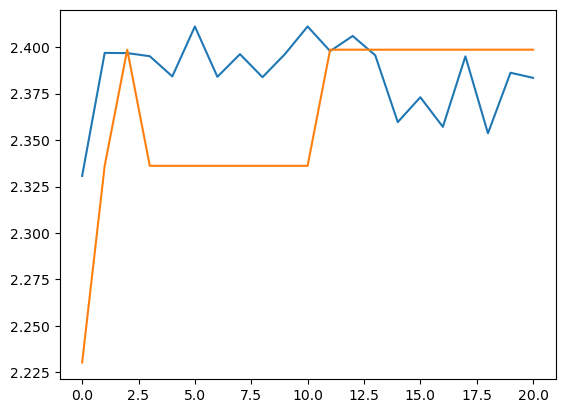

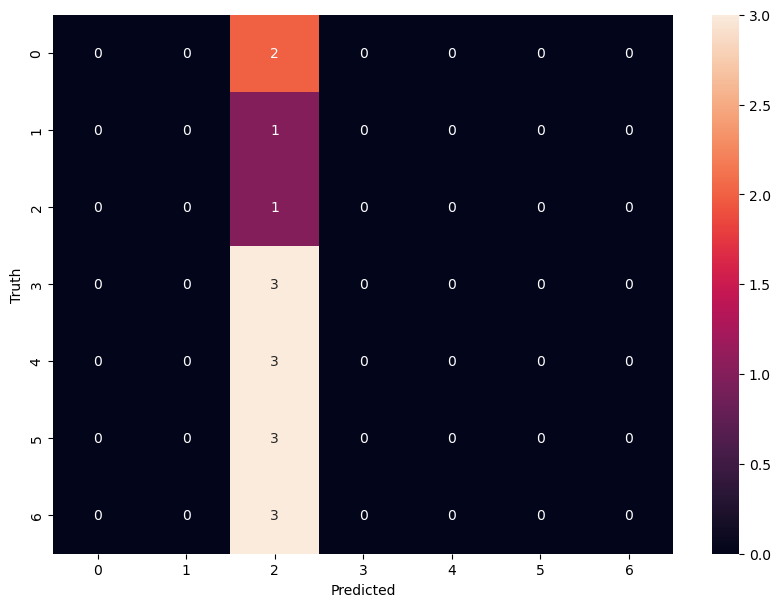

In [ ]:
plt.plot(epochs_count,train_loss)
plt.plot(epochs_count,test_loss)

y_predicted =Model(Xtesting)
y_predicted=y_predicted.cpu()
y_predicted=y_predicted.detach()

ytest=(Ytesting.cpu()).detach()

y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm=confusion_matrix(ytest,y_predicted_labels)
cm

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

sum=0

for i in Ytesting:
    if(y_predicted_labels[i]==Ytesting[i]):
        sum+=1

accuracy=(sum)/len(Ytesting)

print(f"The accuracy of the model on the unknown data is:- {accuracy*100}%")
